In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
df = pd.read_csv("Pasion et al dataset.csv")
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,2.017120e+11,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,2.017120e+11,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,2.017120e+11,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,2.017120e+11,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,2.017120e+11,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [2]:
df = df.dropna()

In [3]:
df.describe()

,Date,Time,Latitude,Longitude,Altitude,YRMODAHRMI,Month,Hour,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
count,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000
mean,2.017720e+07,1267.483725,38.213823,-108.593678,798.843668,2.017718e+11,6.565883,12.627845,37.121941,29.285117,12.978583,10.318318,9.700071,925.944747,515.966785
std,4.579585e+03,167.602767,6.323761,16.364130,770.681794,4.579846e+07,2.983958,1.672952,23.823011,12.366820,7.123255,6.385030,1.351949,85.215659,301.903379
min,2.017052e+07,1000.000000,20.890000,-156.440000,1.000000,2.017050e+11,1.000000,10.000000,0.000000,-19.981770,0.257330,0.000000,0.000000,781.700000,0.000000
25%,2.017111e+07,1100.000000,38.160000,-117.260000,2.000000,2.017110e+11,4.000000,11.000000,17.529300,21.915280,6.404570,6.000000,10.000000,845.500000,140.000000
50%,2.018032e+07,1300.000000,38.950000,-111.180000,458.000000,2.018030e+11,7.000000,13.000000,33.123780,30.289150,13.798700,9.000000,10.000000,961.100000,722.000000
75%,2.018062e+07,1400.000000,41.150000,-104.710000,1370.000000,2.018060e+11,9.000000,14.000000,52.593990,37.474670,18.863650,14.000000,10.000000,1008.900000,722.000000
max,2.018100e+07,1545.000000,47.520000,-80.110000,1947.000000,2.018100e+11,12.000000,15.000000,99.987790,65.738370,34.285020,49.000000,10.000000,1029.500000,722.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [5]:
df.isnull().sum()

Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
PolyPwr          0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
dtype: int64

In [6]:
df = df.drop(['YRMODAHRMI'], axis = 1)

In [7]:
df['Location'].unique()

array(['Camp Murray', 'Grissom', 'Hill Weber', 'JDMT', 'Kahului',
       'Malmstrom', 'March AFB', 'MNANG', 'Offutt', 'Peterson', 'Travis',
       'USAFA'], dtype=object)

In [8]:
#df['Location'] = df['Location'].apply(lambda x: 0 if x == 'Camp Murray' else 1 if x == 'Grisson' else 2 if x=='Hill Weber' else 3 if x=='JDMT' else 4 if x=='kahului' else 5 if x=='Malmstrom' else 6 if x == 'March AFB' else 7 if x=='MNANG' else 8 if x=='Offutt' else 9 if x=='Peterson' else 10 if x=='Travis' else 11)
#df['Season'] = df['Season'].apply(lambda x: 0 if x == 'Winter' else 1 if x == 'Spring' else 2 if x == 'Summer' else 3 )

In [9]:
df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


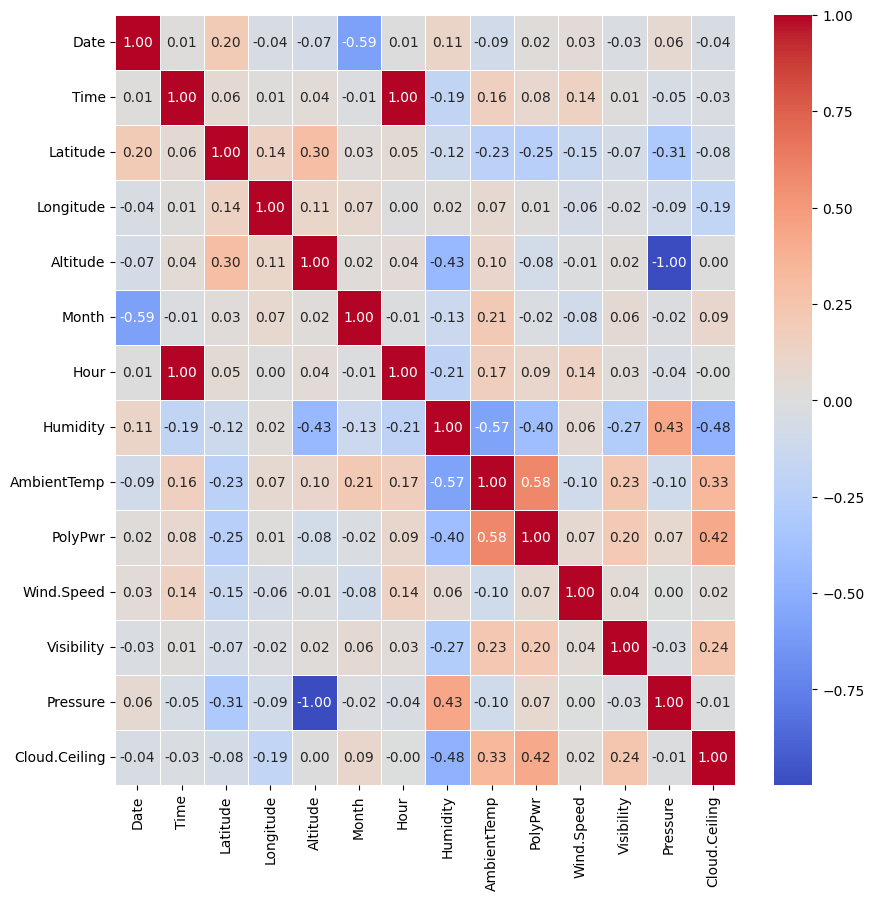

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [10]:
corr = df.corr(numeric_only=float)
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap ='coolwarm',annot=True,linewidths=0.5,fmt='.2f')
plt.show()
df.head()

In [11]:
#df['Location'] = df['Location'].apply(lambda x: 0 if x == 'Camp Murray' else 1 if x == 'Grisson' else 2 if x=='Hill Weber' else 3 if x=='JDMT' else 4 if x=='kahului' else 5 if x=='Malmstrom' else 6 if x == 'March AFB' else 7 if x=='MNANG' else 8 if x=='Offutt' else 9 if x=='Peterson' else 10 if x=='Travis' else 11)
#df['Season'] = df['Season'].apply(lambda x: 0 if x == 'Winter' else 1 if x == 'Spring' else 2 if x == 'Summer' else 3 )

In [12]:
df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [13]:
# Encode season data
df_with_loc_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)


In [14]:
min_hour_of_interest = 10
max_hour_of_interest = 15

In [15]:
df_with_loc_season_en['delta_hr'] = df_with_loc_season_en.Hour - min_hour_of_interest

In [16]:
# Create Cyclic date features
df_with_loc_season_en['sine_mon']= np.sin((df_with_loc_season_en.Month - 1)*np.pi/11)
df_with_loc_season_en['cos_mon']= np.cos((df_with_loc_season_en.Month - 1)*np.pi/11)
df_with_loc_season_en['sine_hr']= np.sin((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))
df_with_loc_season_en['cos_hr']= np.cos((df_with_loc_season_en.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))

In [17]:
print(df_with_loc_season_en)

           Date  Time  Latitude  Longitude  Altitude  Month  Hour  Humidity  \
0      20171203  1145     47.11    -122.57        84     12    11  81.71997   
1      20171203  1315     47.11    -122.57        84     12    13  96.64917   
2      20171203  1330     47.11    -122.57        84     12    13  93.61572   
3      20171204  1230     47.11    -122.57        84     12    12  77.21558   
4      20171204  1415     47.11    -122.57        84     12    14  54.80347   
...         ...   ...       ...        ...       ...    ...   ...       ...   
21040  20180928  1530     38.95    -104.83      1947      9    15  11.66992   
21041  20180929  1300     38.95    -104.83      1947      9    13  18.22510   
21042  20180929  1400     38.95    -104.83      1947      9    14  15.52124   
21043  20180929  1500     38.95    -104.83      1947      9    15   6.63452   
21044  20181001  1400     38.95    -104.83      1947     10    14  22.58301   

       AmbientTemp   PolyPwr  ...  Location_Travis 

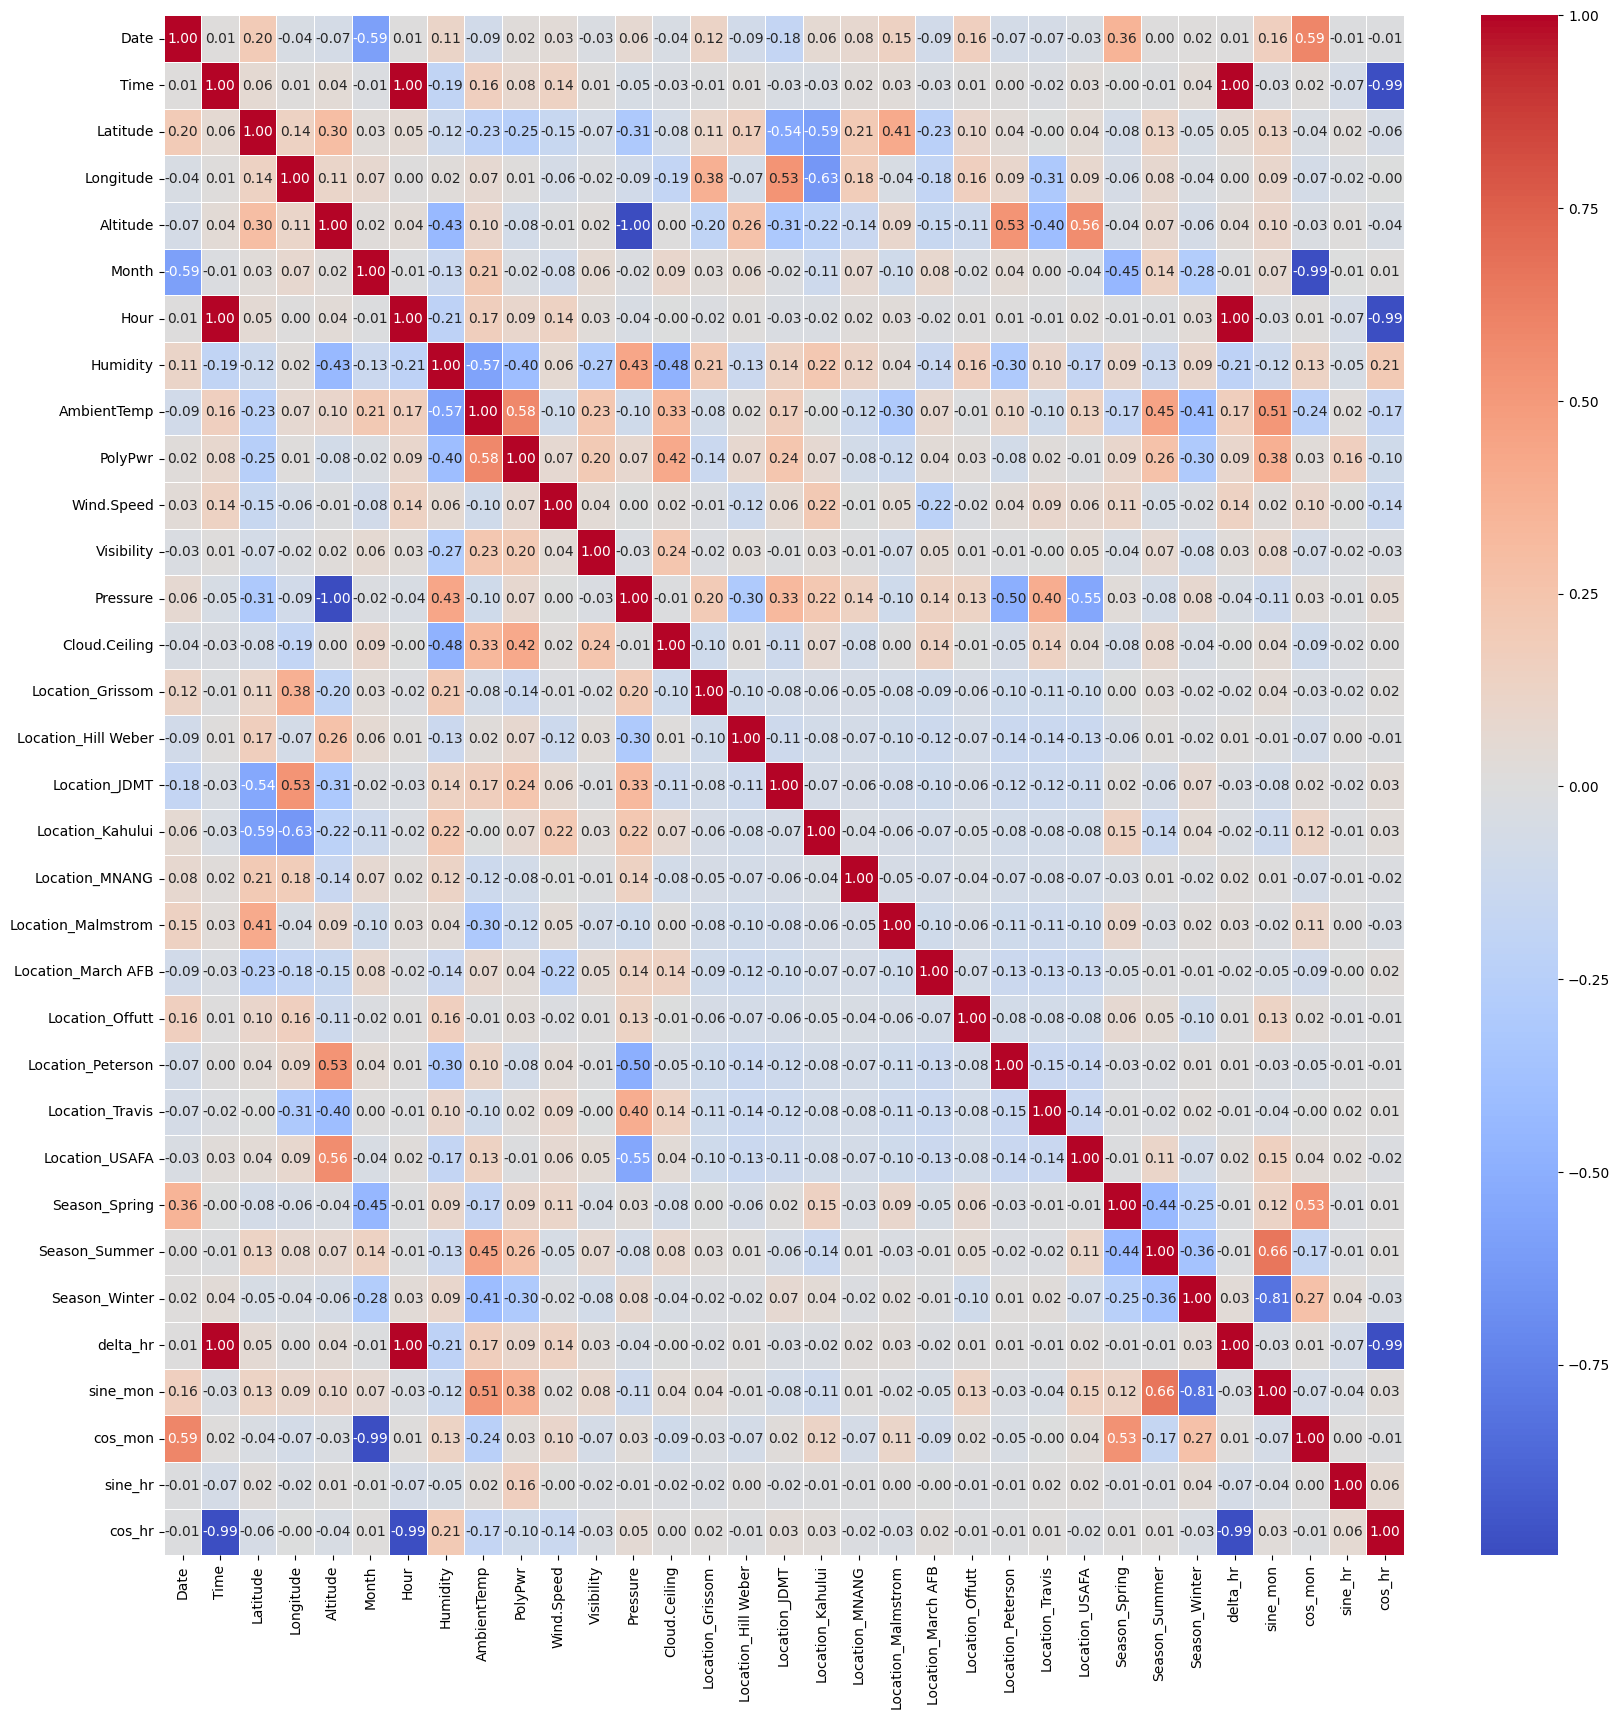

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Pressure,Cloud.Ceiling
0,Camp Murray,20171203,1145,47.11,-122.57,84,12,11,Winter,81.71997,12.86919,2.42769,5,10.0,1010.6,722
1,Camp Murray,20171203,1315,47.11,-122.57,84,12,13,Winter,96.64917,9.66415,2.46273,0,10.0,1011.3,23
2,Camp Murray,20171203,1330,47.11,-122.57,84,12,13,Winter,93.61572,15.44983,4.46836,5,10.0,1011.6,32
3,Camp Murray,20171204,1230,47.11,-122.57,84,12,12,Winter,77.21558,10.36659,1.65364,5,2.0,1024.4,6
4,Camp Murray,20171204,1415,47.11,-122.57,84,12,14,Winter,54.80347,16.85471,6.57939,3,3.0,1023.7,9


In [18]:
corr = df_with_loc_season_en.corr(numeric_only=float)
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap ='coolwarm',annot=True,linewidths=0.5,fmt='.2f')
plt.show()
df.head()

In [19]:
df_with_loc_season_en.drop(['Longitude','Altitude','Date','Time','Month','Hour','Pressure'],axis=1)

,Latitude,Humidity,AmbientTemp,PolyPwr,Wind.Speed,Visibility,Cloud.Ceiling,Location_Grissom,Location_Hill Weber,Location_JDMT,...,Location_Travis,Location_USAFA,Season_Spring,Season_Summer,Season_Winter,delta_hr,sine_mon,cos_mon,sine_hr,cos_hr
0,47.11,81.71997,12.86919,2.42769,5,10.0,722,0,0,0,...,0,0,0,0,1,1,5.665539e-16,-1.000000,5.877853e-01,0.809017
1,47.11,96.64917,9.66415,2.46273,0,10.0,23,0,0,0,...,0,0,0,0,1,3,5.665539e-16,-1.000000,9.510565e-01,-0.309017
2,47.11,93.61572,15.44983,4.46836,5,10.0,32,0,0,0,...,0,0,0,0,1,3,5.665539e-16,-1.000000,9.510565e-01,-0.309017
3,47.11,77.21558,10.36659,1.65364,5,2.0,6,0,0,0,...,0,0,0,0,1,2,5.665539e-16,-1.000000,9.510565e-01,0.309017
4,47.11,54.80347,16.85471,6.57939,3,3.0,9,0,0,0,...,0,0,0,0,1,4,5.665539e-16,-1.000000,5.877853e-01,-0.809017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,38.95,11.66992,43.22510,9.79611,14,10.0,722,0,0,0,...,0,1,0,0,0,5,7.557496e-01,-0.654861,1.224647e-16,-1.000000
21041,38.95,18.22510,28.98247,10.88992,13,10.0,722,0,0,0,...,0,1,0,0,0,3,7.557496e-01,-0.654861,9.510565e-01,-0.309017
21042,38.95,15.52124,33.49167,8.24479,10,10.0,722,0,0,0,...,0,1,0,0,0,4,7.557496e-01,-0.654861,5.877853e-01,-0.809017
21043,38.95,6.63452,51.62163,12.47328,10,10.0,722,0,0,0,...,0,1,0,0,0,5,7.557496e-01,-0.654861,1.224647e-16,-1.000000


In [20]:
# Standardize the data 
from sklearn.preprocessing import MinMaxScaler
X = df_with_loc_season_en.drop('PolyPwr', axis=1)
y = df_with_loc_season_en['PolyPwr']
print(X.shape, y.shape)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

 # Print the shapes of the training and testing sets and top 5 rows of the training set , X_train, y_train and X_test, y_test
print("---Training Data----")
print(X_train.shape, y_train.shape)
print("--- Test Data ---")
print(X_test.shape, y_test.shape)

for i in range(10):
    print("Training Set:", X_train[i], y_train.iloc[i])
    print("Testing Set:", X_test[i], y_test.iloc[i])

(21045, 32) (21045,)
---Training Data----
(14731, 32) (14731,)
--- Test Data ---
(6314, 32) (6314,)
Training Set: [-1.42951406 -0.99587635 -0.00936258 -0.79588516 -1.03715087  0.15208461
 -0.96953333  0.16076211 -0.12113724  0.58065327  0.22107939  1.01111873
  0.68084663 -0.27432731 -0.35661067 -0.30503674 -0.2150251  -0.19488238
 -0.2805708  -0.34081368 -0.20872849 -0.38166486  2.57769765 -0.37262325
 -0.54777895  1.25656539 -0.45504204 -0.96953333  0.91576559 -0.18880692
  0.149921    1.14993023] 19.16925
Testing Set: [-1.40936273  0.79374652  0.11567265  0.22881028  1.48561865  0.48731704
  0.8233609  -0.41802459  0.49821251  0.10933708  0.22107939 -1.48025512
  0.68084663 -0.27432731 -0.35661067 -0.30503674 -0.2150251  -0.19488238
 -0.2805708  -0.34081368 -0.20872849 -0.38166486 -0.38794309  2.6836758
 -0.54777895  1.25656539 -0.45504204  0.8233609   0.67607765 -0.60991935
  0.149921   -1.00400154] 1.64089
Training Set: [ 0.73828692  0.79374652 -0.00936258 -0.79588516 -1.03715087 

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train,y_train)   # Linear regression model
print("model_coeffiecents",lr.coef_)           # model's coffiecients
print("model_intercept",lr.intercept_)         # model's intercepts
y_pred = lr.predict(X_test)                    # predicted values
print("predicted_values",y_pred)

# Evaluation metrics
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
results = {'Linear Regression': [lr_mse, lr_r2]}
results

model_coeffiecents [-8.29530395e-02 -2.85946974e+00  2.34748342e+13  1.11973006e+13
  8.88432072e+12  7.34806778e-01 -8.55471710e+11 -1.74501933e+00
  1.29515040e+00  3.19200788e-01  3.67871582e-04  5.33740790e+00
  1.60339610e+00 -7.23438904e+11  2.41584532e+10  1.30090646e+13
  2.49898159e+13 -2.58350812e+12 -5.30079659e+12  1.25593334e+13
  8.30545934e+10 -7.06892083e+11  1.13015298e+13 -1.08164177e+12
  2.85302674e-01  2.18918304e-01 -2.63604556e-01  8.55471710e+11
  1.96612457e+00  1.67556498e+00  1.30423361e+00 -5.46163615e-01]
model_intercept 13.00503923404488
predicted_values [14.46759068  5.50536194  5.31481316 ... 21.41521935 11.43662175
 13.08809751]


{'Linear Regression': [21.706108990572474, 0.5658425055180887]}

In [22]:
model = RandomForestRegressor()
ttr = TransformedTargetRegressor(regressor = model, transformer=QuantileTransformer(output_distribution='normal'))
ttr.fit(X_train,y_train)
yhat = ttr.predict(X_test)
lr_mse = mean_squared_error(y_test, yhat)
lr_r2 = r2_score(y_test, yhat)
results = {'Linear Regression with randomforest': [lr_mse, lr_r2]}
results

{'Linear Regression with randomforest': [17.616673388458437,
  0.6476378708518795]}

In [23]:
#hyper parameter tuning
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()

In [24]:
search_space ={"num_leaves": [7,61,500], "n_estimators" : [100,200,500],"max_depth" : [3,6,9], "learning_rate" :[0.0001,0.01,0.1,1],"objective": ['rmse','mae','mape'],"feature_fraction":[0.5,1]}

In [25]:
GS = GridSearchCV(estimator = lgb_model, param_grid = search_space, scoring= ["r2","neg_root_mean_squared_error"],refit="r2",cv=3,verbose=4)


In [26]:
GS.fit(X_train,y_train)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 1/3] END feature_fraction=0.5, learning_rate=0.0001, max_depth=3, n_estimators=100, num_leaves=7, objective=rmse; neg_root_mean_squared_error: (test=-7.103) r2: (test=0.007) total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 2/3] END feature_fraction=0.5, learning_rate=0.0001, max_depth=3, n_estimators=100, num_leaves=7, objective=rmse; neg_root_mean_squared_error: (test=-7.186) r2: (test=0.008) total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[CV 3/3] END feature_fraction=0.5, learning_rate=0.0001, max_depth=3, n_estimators=100, num_leaves=7, objective=rmse; neg_root_mean_squared_error: (test=-7.066) r2: (test

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'feature_fraction': [0.5, 1],
                         'learning_rate': [0.0001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [7, 61, 500],
                         'objective': ['rmse', 'mae', 'mape']},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [27]:
print(GS.best_params_)

{'feature_fraction': 0.5, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500, 'num_leaves': 500, 'objective': 'rmse'}


In [28]:
print((GS.best_score_))

0.6798293096638526


In [30]:
GS2 = LGBMRegressor(feature_fraction=0.5, learning_rate=0.01,max_depth=9,n_estimators=500,num_leaves=500,objective='rmse')
ls = GS2.fit(X_train,y_train)
print("score",ls.score(X_test,y_test))
y_pred_2 = ls.predict(X_test)
lr_mse = mean_squared_error(y_pred_2, yhat)
lr_r2 = r2_score(y_test, yhat)
results = {'Linear Regression with LGBMregressor': [lr_mse, lr_r2]}
results

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
score 0.6729292919731886


{'Linear Regression with LGBMregressor': [2.509457881522475,
  0.6476378708518795]}